In [1]:
using Pkg; Pkg.activate("..");

using StochasticFrontiers;

  Activating project at `~/Documents/project/StochasticFrontiers.jl`


In [2]:
# Example: Truncated Normal, Wang 2002


# model specification
res = sfmodel_fit(
    spec = sfspec(
        data      = "data/sampledata.csv", 
        model     = Cross(), 
        type      = Prod(), 
        dist      = Trun(μ = (:age, :school, :yr, :_cons), σᵤ² = (:age, :school, :yr, :_cons)),
        σᵥ²       = :_cons, 
        depvar    = :yvar, 
        frontiers = (:Lland, :PIland, :Llabor, :Lbull, :Lcost, :yr, :_cons)
    ),
    options = sfopt(warmstart_maxIT = 400),
    init = sfinit(
        μ       = fill(0.1, 4), 
        log_σᵤ² = fill(-0.1, 4), 
        log_σᵥ² = -0.1
    )
);


*********************************
      Model Specification      
*********************************

    Base stochastic frontier model

    Yᵢ = Xᵢ*β + + ϵᵢ
        where ϵᵢ = vᵢ - uᵢ

        further,     
            vᵢ ∼ N(0, σᵥ²),
            σᵥ²  = exp(log_σᵥ²)

            uᵢ ∼ N⁺(0, σᵤ²),
            σᵤ² = exp(log_σᵤ²)

    In the case of type(cost), "- uᵢₜ" above should be changed to "+ uᵢₜ"

*********************************
        Estimation Results 
*********************************

 Converge:                   true
 Log-likelihood Value:       -82.02573

 Number Of Total Iterations: 419
 Time Consuming:             0.16441
 Numberf Of Observations:    271

┌───────────┬────────┬─────────┬───────────┬──────────┬──────────┬───────────┬───────────┐
│           │   Var. │   Coef. │ Std. Err. │        z │ Pr(>|z|) │ Lower 95% │ Upper 95% │
├───────────┼────────┼─────────┼───────────┼──────────┼──────────┼───────────┼───────────┤
│ frontiers │  Lland │  0.2582 │    0.0725 │  

In [3]:
sfcheck_converge(res)

 * Status: success

 * Candidate solution
    Final objective value:     8.202573e+01

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 1.76e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.38e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.41e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 7.81e-14 ≰ 0.0e+00
    |g(x)|                 = 8.63e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    19
    f(x) calls:    689
    ∇f(x) calls:   77
    ∇²f(x) calls:  19



In [4]:
options = sfoptions(res)
Dict{Symbol, Any}(zip(keys(options), values(options)))

Dict{Symbol, Any} with 8 entries:
  :show_trace       => false
  :verbose          => true
  :table_format     => :text
  :warmstart_solver => NelderMead{AffineSimplexer, AdaptiveParameters}(AffineSi…
  :tolerance        => 1.0e-8
  :warmstart_maxIT  => 400
  :main_maxIT       => 2000
  :main_solver      => Newton{InitialStatic{Float64}, HagerZhang{Float64, RefVa…

In [5]:
# initial and the MLE
[sfmodel(res).paramnames  sfstartpt(res) sfmaximizer(res)]

16×4 Matrix{Any}:
 :frontiers  :Lland    0.273592     0.258216
 Symbol("")  :PIland   0.108956     0.171738
 Symbol("")  :Llabor   1.26251      1.1658
 Symbol("")  :Lbull   -0.50067     -0.421468
 Symbol("")  :Lcost    0.00177811   0.0142391
 Symbol("")  :yr       0.049151     0.0182522
 Symbol("")  :_cons    0.877344     1.54294
 :μ          :age      0.1         -0.0479008
 Symbol("")  :school   0.1         -0.214289
 Symbol("")  :yr       0.1          0.147961
 Symbol("")  :_cons    0.1          1.04183
 :log_σᵤ²    :age     -0.1          0.025636
 Symbol("")  :school  -0.1          0.114086
 Symbol("")  :yr      -0.1         -0.225592
 Symbol("")  :_cons   -0.1         -1.13991
 :log_σᵥ²    :_cons   -0.1         -3.26671

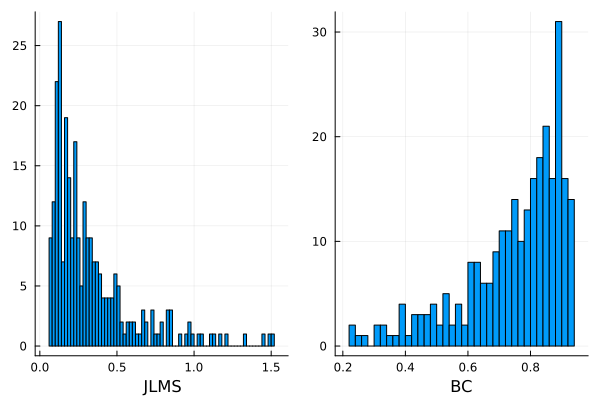

In [6]:
plot_inefficieny(res)

In [7]:
# mean marginal effect

marginal, marginal_mean = sfmarginal(res)
Dict{Symbol, Float64}(zip(keys(marginal_mean), values(marginal_mean)))

Dict{Symbol, Float64} with 3 entries:
  :marg_age    => -0.002645
  :marg_school => -0.0119745
  :marg_yr     => -0.0265006

In [8]:
# bootstrap std of mean marginal effects
std_ci, bsdata = sfmarginal_bootstrap(res, R = 250, seed = 123);

Resampling:  70%|█████████████████████         |  ETA: 0:00:24┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
Resampling:  86%|█████████████████████████▊    |  ETA: 0:00:10┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches ~/.julia/packages/LineSearches/G1LRk/src/hagerzhang.jl:148
Resampling: 100%|██████████████████████████████| Time: 0:01:06



Bias-Corrected 95% Confidence Interval:

┌────────┬──────────────────────────────┬───────────┬───────────┬───────────┐
│        │ mean marginal effect of E(u) │ Std. Err. │ Lower 95% │ Upper 95% │
├────────┼──────────────────────────────┼───────────┼───────────┼───────────┤
│    age │                     -0.00264 │   0.00225 │  -0.00734 │    0.0016 │
│ school │                     -0.01197 │   0.01766 │  -0.04762 │   0.01224 │
│     yr │                     -0.02650 │   0.01213 │  -0.05257 │  -0.00447 │
└────────┴──────────────────────────────┴───────────┴───────────┴───────────┘



In [9]:
# confidence interval of mean marginal effect
ci = sfCI(bsdata, marginal_mean, level = 0.1)

3×2 Matrix{Float64}:
 -0.00655   0.0009
 -0.04064   0.00915
 -0.04657  -0.00872